# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>

1) Book review

2) Truth value for postivie review

3) This is a supervised binary classification problem.

4) Review and postive review

5) This is an important problem because companies can use it to determine the popularity of a book. Which they could use that information to do other things like order more copies of the book for sales, and spend more money marketing the book.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df['Positive Review'].value_counts(normalize=True))
print(df.describe())
df.dtypes

False    0.503294
True     0.496706
Name: Positive Review, dtype: float64
                                                   Review Positive Review
count                                                1973            1973
unique                                               1865               2
top     I have read several of Hiaasen's books and lov...           False
freq                                                    3             993


Review             object
Positive Review      bool
dtype: object

In [4]:
print('Number of NaN in reviews column: ', df['Review'].isnull().sum())
print('Number of NaN values in positive review column: ', df['Positive Review'].isnull().sum())

Number of NaN in reviews column:  0
Number of NaN values in positive review column:  0


In [5]:
unique_in_positive_review = df['Positive Review'].unique()  # this tells us the different values stored in this colum
# print(unique_in_positive_review) this prints true or false

value_counts = df['Positive Review'].value_counts() # this counts how many unique true false answers we have
value_counts

False    993
True     980
Name: Positive Review, dtype: int64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
1)Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data?

After inspecting the file, I noticed that there was 2 columns. The "Review" and "Positive Review" column. Since I am using the "Review" column as the feature and the "Positive Review" column as the label, there is no need to remove any features. So I do not have a new feature list.

2)Explain different data preparation techniques that you will use to prepare your data for modeling.

Since this is a NLP (Natural Langauge Processing) problem, I will start by cleaning the data. This part involves steps such as converting the text to lowercase, removing filler words (and, is, the) and punctuation, and sometimes lemmatization (using the base word, no prefix/sufix).
From there I will apply tokenization. 
After that I will vectorize the words using methods like TF-IDF. A tool like TfidfVectorizer does everything I mentioned above. I would also encode the labels into 0's or 1's. Then I am ready to spilt and train the model with the test_train_spilt() method.

Afterwards I would evaluate the model by gathering different metrics like accuracry, loss, and AUC scores.

3)What is your model (or models)?

I will use a Logisitic Regression model, a Decision Tree model, and a Neural Network.

4)Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data

- Apply vectorizaion method (TF-IDF)
- Train the Logisitic Regression model on the dataset
- Use cross validation to ensure that the model generalizes well
- Use metrics like accurarcy, auc Score, and loss to understand the overall preformance
- Use confusion matrix to visualize the outcomes
- Tune hyperparameters for DT if needed
- Selected best model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss
from sklearn.pipeline import Pipeline
import tensorflow.keras as keras
import time

2025-07-30 01:48:58.675470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-07-30 01:48:58.675498: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# YOUR CODE HERE
y = df['Positive Review']
X = df['Review']
# y
X

0       This was perhaps the best of Johannes Steinhof...
1       This very fascinating book is a story written ...
2       The four tales in this collection are beautifu...
3       The book contained more profanity than I expec...
4       We have now entered a second time of deep conc...
                              ...                        
1968    I purchased the book with the intention of tea...
1969    There are so many design books, but the Graphi...
1970    I am thilled to see this book being available ...
1971    As many have stated before me the book starts ...
1972    I love this book! It is a terrific blend of ha...
Name: Review, Length: 1973, dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Training Logistic Regression Model with TD-IDF vectorization

In [9]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [10]:
model_default = LogisticRegression(max_iter=1000)
model_default.fit(X_train_tfidf,y_train)

LogisticRegression(max_iter=1000)

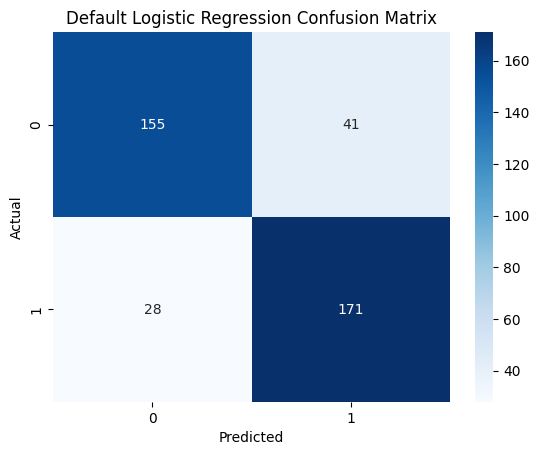

In [11]:
proba_predictions_default = model_default.predict_proba(X_test_tfidf)[:, 1]

class_label_predictions_default = model_default.predict(X_test_tfidf)
cm_df = confusion_matrix(y_test,class_label_predictions_default)

sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Default Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
cs=[10**i for i in range(-5,5)]
max_iters = [100, 200, 300, 500, 1000, 2000]

param_grid = {
    "C": cs,
    "max_iter": max_iters
}

param_grid

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
 'max_iter': [100, 200, 300, 500, 1000, 2000]}

In [13]:
print('Running Grid Search...')

# 1. Create a LogisticRegression model object with the argument max_iter=1000. 
#    Save the model object to the variable 'model'
# YOUR CODE HERE
model = LogisticRegression(max_iter=1000)

# 2. Run a grid search with 5-fold cross-validation and assign the output to the 
# object 'grid'.
# YOUR CODE HERE
grid = GridSearchCV(estimator = model,param_grid=param_grid, cv= 5)

# 3. Fit the model on the training data and assign the fitted model to the 
#    variable 'grid_search'
# YOUR CODE HERE
grid_search = grid.fit(X_train_tfidf, y_train)

print('Done')

Running Grid Search...
Done


In [14]:
best_C = grid_search.best_params_['C']
print('best C is', best_C)

best_max_iter = grid_search.best_params_['max_iter']
print('best max_iter is', best_max_iter)

best C is 10
best max_iter is 100


In [15]:
# Training Best Hyperparmeter Logistic Regression Model
model_best = LogisticRegression(C= best_C, max_iter=best_max_iter)
model_best.fit(X_train_tfidf,y_train)

LogisticRegression(C=10)

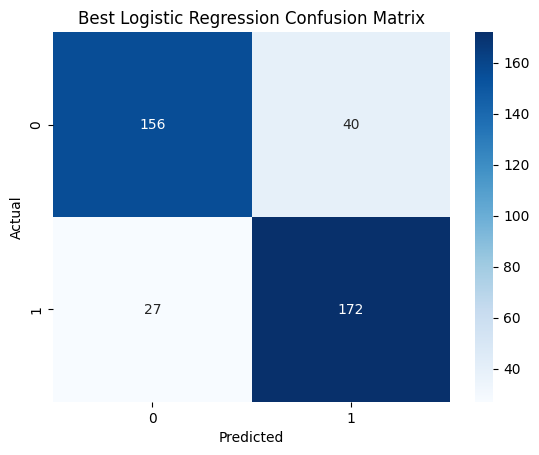

In [16]:
proba_predictions_best = model_best.predict_proba(X_test_tfidf)[:, 1]

# 2. Make predictions on the test data using the predict() method
# YOUR CODE HERE
class_label_predictions_best = model_best.predict(X_test_tfidf)
cm_best = confusion_matrix(y_test,class_label_predictions_best)

sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Best Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [17]:
modelLR_best = LogisticRegression(max_iter=best_max_iter, C=best_C)

modelLR_best.fit(X_train_tfidf, y_train)

probability_predictionsLR_best = modelLR_best.predict_proba(X_test_tfidf)[:,1]
class_label_predictionsLR_best = modelLR_best.predict(X_test_tfidf)

aucLR_best = roc_auc_score(y_test, probability_predictionsLR_best)
accuracyLR_best = accuracy_score(y_test, class_label_predictionsLR_best)
lossLR = log_loss(y_test, probability_predictionsLR_best)

print("\n Logistic Regression (TF-IDF)")
print(f"AUC Score   : {aucLR_best:.4f}")
print(f"Accuracy    : {accuracyLR_best:.4f}")
print(f"Log Loss (Logistic Regression): {lossLR:.4f}")


 Logistic Regression (TF-IDF)
AUC Score   : 0.9224
Accuracy    : 0.8304
Log Loss (Logistic Regression): 0.3828


## Training Decision Tree with TD-IDF vectorizer

In [18]:
param_grid = {
    'max_depth': [None, 1, 5, 10, 20, 30, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30]  
}
param_grid

{'max_depth': [None, 1, 5, 10, 20, 30, 50],
 'min_samples_leaf': [1, 5, 10, 20, 30]}

In [19]:
modelDT_tfidf = DecisionTreeClassifier(criterion='entropy')

gridDT_tfidf = GridSearchCV(modelDT_tfidf, param_grid, cv=5)

grid_searchDT_tfidf = gridDT_tfidf.fit(X_train_tfidf, y_train)

print('Done')

Done


In [20]:
best_max_depth = grid_searchDT_tfidf.best_params_['max_depth']
print('best max_depth is', best_max_depth)

best_min_samples_leaf = grid_searchDT_tfidf.best_params_['min_samples_leaf']
print('best min_samples_leaf is', best_min_samples_leaf)

best max_depth is 10
best min_samples_leaf is 20


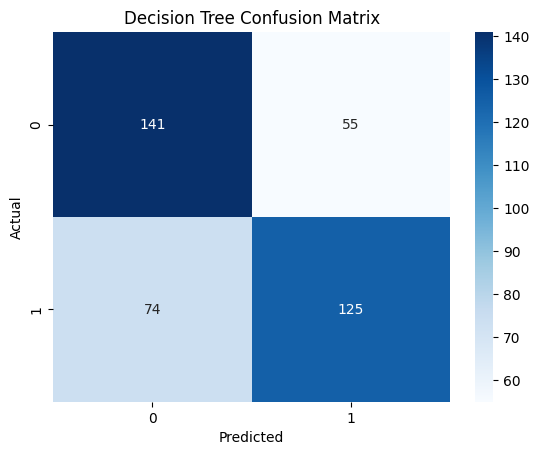


 Decision Tree (TF-IDF)
AUC Score   : 0.7115
Accuracy    : 0.6734
Log Loss (Decision Tree): 1.3572


In [21]:
modelDT_best_tfidf = DecisionTreeClassifier(criterion = 'entropy', max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf)
  
modelDT_best_tfidf.fit(X_train_tfidf, y_train)
    
probability_predictionsDT_tfidf = modelDT_best_tfidf.predict_proba(X_test_tfidf)[:,1]
class_label_predictionsDT_tfidf = modelDT_best_tfidf.predict(X_test_tfidf)

cm_DT = confusion_matrix(y_test,class_label_predictionsDT_tfidf)

sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

aucDT_tfidf = roc_auc_score(y_test, probability_predictionsDT_tfidf)
accuracyDT_tfidf = accuracy_score(y_test, class_label_predictionsDT_tfidf)
lossDT = log_loss(y_test, probability_predictionsDT_tfidf)

print("\n Decision Tree (TF-IDF)")
print(f"AUC Score   : {aucDT_tfidf:.4f}")
print(f"Accuracy    : {accuracyDT_tfidf:.4f}")
print(f"Log Loss (Decision Tree): {lossDT:.4f}")

## Training Neural Networks with TD-IDF Vectorizers

In [22]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


In [23]:
# 1. Create model object
# YOUR CODE HERE
nn_model = keras.Sequential()


# 2. Create the input layer and add it to the model object: 
# YOUR CODE HERE
nn_model.add(keras.layers.InputLayer(input_shape=(X_train_tfidf.shape[1],)))


# 3. Create the first hidden layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(keras.layers.Dense(64, activation='relu'))

# 4. Create the second layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(keras.layers.Dense(32, activation='relu'))

# 5. Create the third layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(keras.layers.Dense(16, activation='relu'))

nn_model.add(keras.layers.Dropout(.25))


# 6. Create the output layer and add it to the model object:
# YOUR CODE HERE
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))


# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1217920   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,220,545
Trainable params: 1,220,545
Non-trainable params: 0
_________________________________________________________________


2025-07-30 01:49:49.776934: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-07-30 01:49:49.776958: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2025-07-30 01:49:49.776974: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-0d4baadea6602ecd4): /proc/driver/nvidia/version does not exist
2025-07-30 01:49:49.777156: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))


In [25]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

t0 = time.time() # start time

num_epochs = 100 # epochs

history = nn_model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)]
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

2025-07-30 01:49:50.101876: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2025-07-30 01:49:50.102269: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649995000 Hz


Epoch [5/ 100], Loss: 0.6882, Accuracy: 0.5666, Val_loss: 0.6885, Val_accuracy: 0.5285
Epoch [10/ 100], Loss: 0.6421, Accuracy: 0.6997, Val_loss: 0.6497, Val_accuracy: 0.7089
Epoch [15/ 100], Loss: 0.5411, Accuracy: 0.7227, Val_loss: 0.6842, Val_accuracy: 0.5570
Epoch [20/ 100], Loss: 0.3315, Accuracy: 0.8574, Val_loss: 0.4265, Val_accuracy: 0.7816
Epoch [25/ 100], Loss: 0.1766, Accuracy: 0.9429, Val_loss: 0.4419, Val_accuracy: 0.8038
Epoch [30/ 100], Loss: 0.0502, Accuracy: 0.9968, Val_loss: 0.5361, Val_accuracy: 0.8006
Epoch [35/ 100], Loss: 0.0128, Accuracy: 1.0000, Val_loss: 0.5555, Val_accuracy: 0.8101
Epoch [40/ 100], Loss: 0.0067, Accuracy: 1.0000, Val_loss: 0.5895, Val_accuracy: 0.8070
Epoch [45/ 100], Loss: 0.0040, Accuracy: 1.0000, Val_loss: 0.6140, Val_accuracy: 0.8070
Epoch [50/ 100], Loss: 0.0036, Accuracy: 1.0000, Val_loss: 0.6449, Val_accuracy: 0.8070
Epoch [55/ 100], Loss: 0.0037, Accuracy: 1.0000, Val_loss: 0.6714, Val_accuracy: 0.8070
Epoch [60/ 100], Loss: 0.0039, Ac

In [26]:
nn_probabilities = nn_model.predict(X_test_tfidf.toarray())

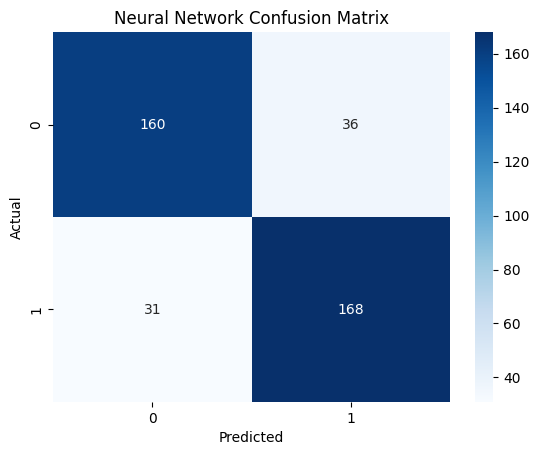

13/13 [==============================] - 0s 1ms/step - loss: 0.8062 - accuracy: 0.8304

 Neural Network (TF-IDF)
AUC Score: 0.9058
Accuracy    : 0.8304
Log Loss (Neural Network): 0.8062


In [27]:
nn_class_predictions = (nn_probabilities > 0.5).astype(int)

# Confusion matrix
cm_NN = confusion_matrix(y_test, nn_class_predictions)

sns.heatmap(cm_NN, annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

lossNN_best, accuracyNN_best = nn_model.evaluate(X_test_tfidf.toarray(), y_test)
auc_nn = roc_auc_score(y_test, nn_probabilities)

print("\n Neural Network (TF-IDF)")
print(f"AUC Score: {auc_nn:.4f}")
print(f"Accuracy    : {accuracyNN_best:.4f}")
print(f"Log Loss (Neural Network): {lossNN_best:.4f}")


## Additional Analysis


In [28]:
print("\n Logistic Regression (TF-IDF)")
print(f"AUC Score   : {aucLR_best:.4f}")
print(f"Accuracy    : {accuracyLR_best:.4f}")
print(f"Log Loss (Logistic Regression): {lossLR:.4f}")

print("\n Decision Tree (TF-IDF)")
print(f"AUC Score   : {aucDT_tfidf:.4f}")
print(f"Accuracy    : {accuracyDT_tfidf:.4f}")
print(f"Log Loss (Decision Tree): {lossDT:.4f}")

print("\n Neural Network (TF-IDF)")
print(f"AUC Score: {auc_nn:.4f}")
print(f"Accuracy    : {accuracyNN_best:.4f}")
print(f"Log Loss (Neural Network): {lossNN_best:.4f}")




 Logistic Regression (TF-IDF)
AUC Score   : 0.9224
Accuracy    : 0.8304
Log Loss (Logistic Regression): 0.3828

 Decision Tree (TF-IDF)
AUC Score   : 0.7115
Accuracy    : 0.6734
Log Loss (Decision Tree): 1.3572

 Neural Network (TF-IDF)
AUC Score: 0.9058
Accuracy    : 0.8304
Log Loss (Neural Network): 0.8062


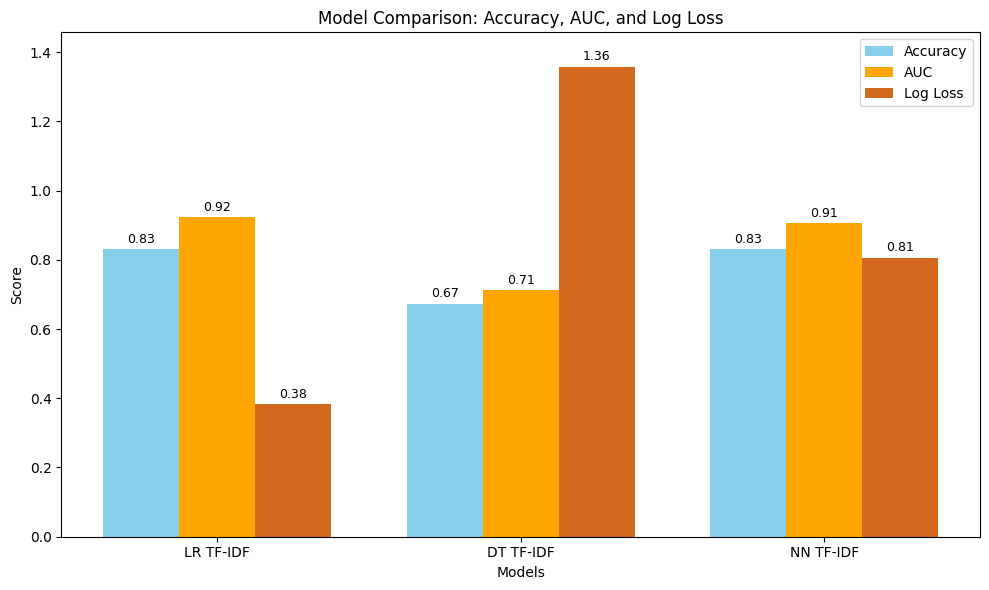

In [29]:
accuracy = [accuracyLR_best, accuracyDT_tfidf, accuracyNN_best]
auc = [aucLR_best, aucDT_tfidf, auc_nn]
loss = [lossLR, lossDT, lossNN_best]
names = ['LR TF-IDF', 'DT TF-IDF', 'NN TF-IDF']


x = range(len(names))  # Base x positions
bar_width = 0.25       # Width of each bar

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each metric offset by bar width
bars1 = plt.bar([i - bar_width for i in x], accuracy, width=bar_width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x, auc, width=bar_width, label='AUC', color='orange')
bars3 = plt.bar([i + bar_width for i in x], loss, width=bar_width, label='Log Loss', color='chocolate')

# Add value labels to bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
                 ha='center', va='bottom', fontsize=9)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)


plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, AUC, and Log Loss')
plt.xticks(ticks=x, labels=names)
plt.ylim(0, max(max(accuracy), max(auc), max(loss)) + 0.1)
plt.legend()
plt.tight_layout()

plt.show()

Based on the evaluation metrics, the Logistic Regression model performs the best overall. It has the highest AUC score (0.9224), meaning it is best at distinguishing between the two classes. Its accuracy (0.8304) is also the highest, showing it makes the most correct predictions. Additionally, it has the lowest log loss (0.3828), which means its predicted probabilities are the most confident and accurate. The Neural Network comes close in AUC and accuracy but has a much higher log loss. The Decision Tree performs the worst in all three metrics, making it the least reliable model for this task.

While the accuracy scores for LR and NN are neglible, LG has a slightly higher AUC score and that means that it's predications are slight better and higher ranking than the NN. Also since NN has much higher log loss, it means that when the model is wrong, it is wrong by a huge margin.